In [372]:
import pandas as pd
import os
import os.path
import matplotlib.pyplot as plt
import re

LOCALAPPDATA = os.getenv("LOCALAPPDATA")

filename = os.path.join(LOCALAPPDATA,r"Unity\Editor\Editor.log")

In [373]:
with open(filename) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]

In [374]:
print(len(lines))

187157


In [375]:
index = 0
lastStartGameIndex = -1
for line in lines:
    if line.startswith("Start Game"):
        lastStartGameIndex = index;
    index = index + 1
lines = lines[lastStartGameIndex:]
index = 0
for line in lines:
    if line.startswith("(Filename: "):
        break
    index = index + 1
lines = lines[index:]


In [376]:
index = 0
oldIndex = 0
messages = []

while(index < len(lines)-1):
    
    for line in lines[oldIndex+1:]:    
        index = index + 1  
        if line.startswith("(Filename: "):
            break
          
        
    messageLines = lines[oldIndex:index]
    oldIndex = index   
    
    message = dict()
    message["Filename"] = messageLines[0]
    message["Message"] = messageLines[2]
    messages.append(message)
df = pd.DataFrame.from_dict(messages)

In [377]:
df_playerUpdate = df[[x.startswith("Player.Update: ") for x in df["Message"]]].copy()
df_playerUpdate["deltaTime"] = [float(re.findall("\d+[\.\d]*", x)[0]) for x in df_playerUpdate["Message"]]

In [378]:
df_playerFixedUpdate = df[[x.startswith("Player.FixedUpdate: ") for x in df["Message"]]].copy()
df_playerFixedUpdate["deltaTime"] = [float(re.findall("\d+[\.\d]*", x)[0]) for x in df_playerFixedUpdate["Message"]]

In [379]:
df_gameManagerUpdate = df[[x.startswith("GameManager.Update: ") for x in df["Message"]]].copy()
df_gameManagerUpdate["deltaTime"] = [float(re.findall("\d+[\.\d]*", x)[0]) for x in df_gameManagerUpdate["Message"]]

In [384]:
df_totUpdate = df[[x.startswith("Total.Update: ") for x in df["Message"]]].copy()
df_totUpdate["deltaTime"] = [float(re.findall("\d+[\.\d]*", x)[0]) for x in df_totUpdate["Message"]]

(0.0, 500.0)

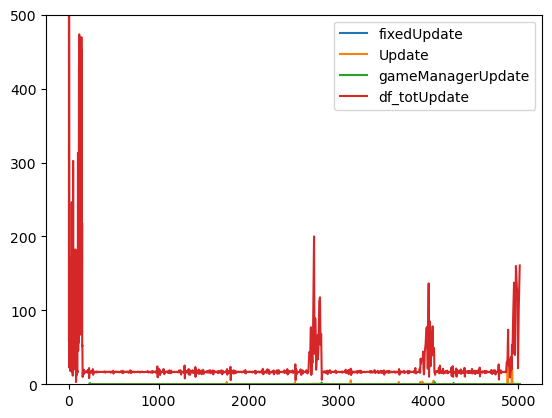

In [387]:
plt.plot(df_playerFixedUpdate["deltaTime"])
plt.plot(df_playerUpdate["deltaTime"])
plt.plot(df_gameManagerUpdate["deltaTime"])
plt.plot(df_totUpdate["deltaTime"])
plt.legend(["fixedUpdate","Update","gameManagerUpdate","df_totUpdate"])
plt.ylim(0,500)

In [356]:
print(sum(df_playerFixedUpdate["deltaTime"]))
print(sum(df_playerUpdate["deltaTime"]))
print(sum(df_gameManagerUpdate["deltaTime"]))

31.73255951300026
164.16358699999893
39.712906049000026


In [359]:
1000/8

125.0

In [250]:
df_playerUpdate["Message"].iloc[1000]

'Player.Update: 0.2708435ms'

In [235]:
df_playerUpdate["Message"].iloc[0]

'Player.Update: 0.6637573ms'

In [238]:
df_playerUpdate["Message"].iloc[0]

'0.6637573'

In [30]:
lines

['(Filename: Assets/Scripts/GameManager.cs Line: 15)',
 '',
 'Seed: 75',
 'UnityEngine.StackTraceUtility:ExtractStackTrace ()',
 'UnityEngine.DebugLogHandler:LogFormat (UnityEngine.LogType,UnityEngine.Object,string,object[])',
 'UnityEngine.Logger:Log (UnityEngine.LogType,object)',
 'UnityEngine.Debug:Log (object)',
 'GameManager:Start () (at Assets/Scripts/GameManager.cs:19)',
 '',
 '(Filename: Assets/Scripts/GameManager.cs Line: 19)',
 '',
 'Start CreateVoxelMapsTask(async)',
 'UnityEngine.StackTraceUtility:ExtractStackTrace ()',
 'UnityEngine.DebugLogHandler:LogFormat (UnityEngine.LogType,UnityEngine.Object,string,object[])',
 'UnityEngine.Logger:Log (UnityEngine.LogType,object)',
 'UnityEngine.Debug:Log (object)',
 'World/<CreateVoxelMapsTaskAsync>d__37:MoveNext () (at Assets/Scripts/World.cs:234)',
 'System.Runtime.CompilerServices.AsyncTaskMethodBuilder`1<System.Collections.Generic.IEnumerable`1<WorldGenerationData>>:Start<World/<CreateVoxelMapsTaskAsync>d__37> (World/<CreateVoxe

In [28]:
index

4200